Import required libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline


Collecting, Reading and interpreting the shape of the dataset

In [ ]:
df = pd.read_csv('/content/archive.zip',header=None)
print(df.head())
df.shape

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

(208, 61)

Statistical measuring of data

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

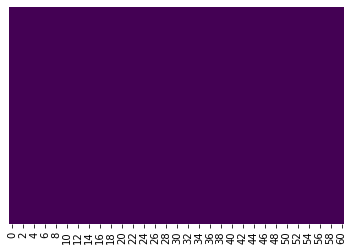

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Lets look out the how much values have rock and mine in target table


In [ ]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M---> mine and R --> Rock -Note : It look like balanaced dataset it means it helps get good accuracy rate in fututre model building

Splitting the dataset into groups


In [ ]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


Lets do one hot encoding for the target value

In [ ]:
def convertion(text):
    if 'R' in text:
      return 0
    elif 'M' in text:
      return 1

df[60]= df[60].apply(convertion)


Separating Data and Labels

In [ ]:
X = df.drop(columns=60, axis=1) #Independent data
Y = df[60] #dependent data

In [ ]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

1 --> Mine and 0 --> rock using one hot encoding techniques

In [ ]:
# Independent data
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [ ]:
# Depedent data after encoding 
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

**Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
# Lets import required libraries for feature importances and also fit the dependent and independent data
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [ ]:
print(model.feature_importances_)

[0.01152476 0.00547251 0.00500731 0.0160783  0.00796595 0.00987663
 0.00725023 0.00825006 0.0341437  0.03124374 0.09731729 0.07176777
 0.02314115 0.00838065 0.01310994 0.02141401 0.02291802 0.0125462
 0.00978161 0.02996274 0.02855535 0.01048158 0.01512847 0.00736838
 0.00809968 0.01780524 0.01807364 0.01317943 0.00823    0.00998562
 0.01487591 0.01004351 0.00982616 0.00508964 0.00704867 0.03306259
 0.03179683 0.00412641 0.01122774 0.00687793 0.00732462 0.0099599
 0.01249588 0.01278488 0.03409532 0.0165046  0.02032705 0.02179159
 0.03041201 0.00635534 0.0214221  0.01395397 0.01180475 0.01609071
 0.00928881 0.00609789 0.00520146 0.00751738 0.01184757 0.0066888 ]


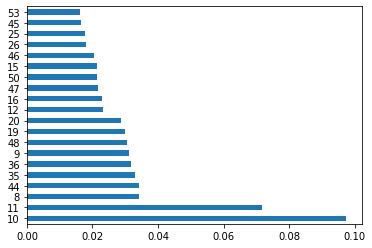

In [ ]:
# Top 20 features visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [ ]:
corrmat = df.corr()
corrmat.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

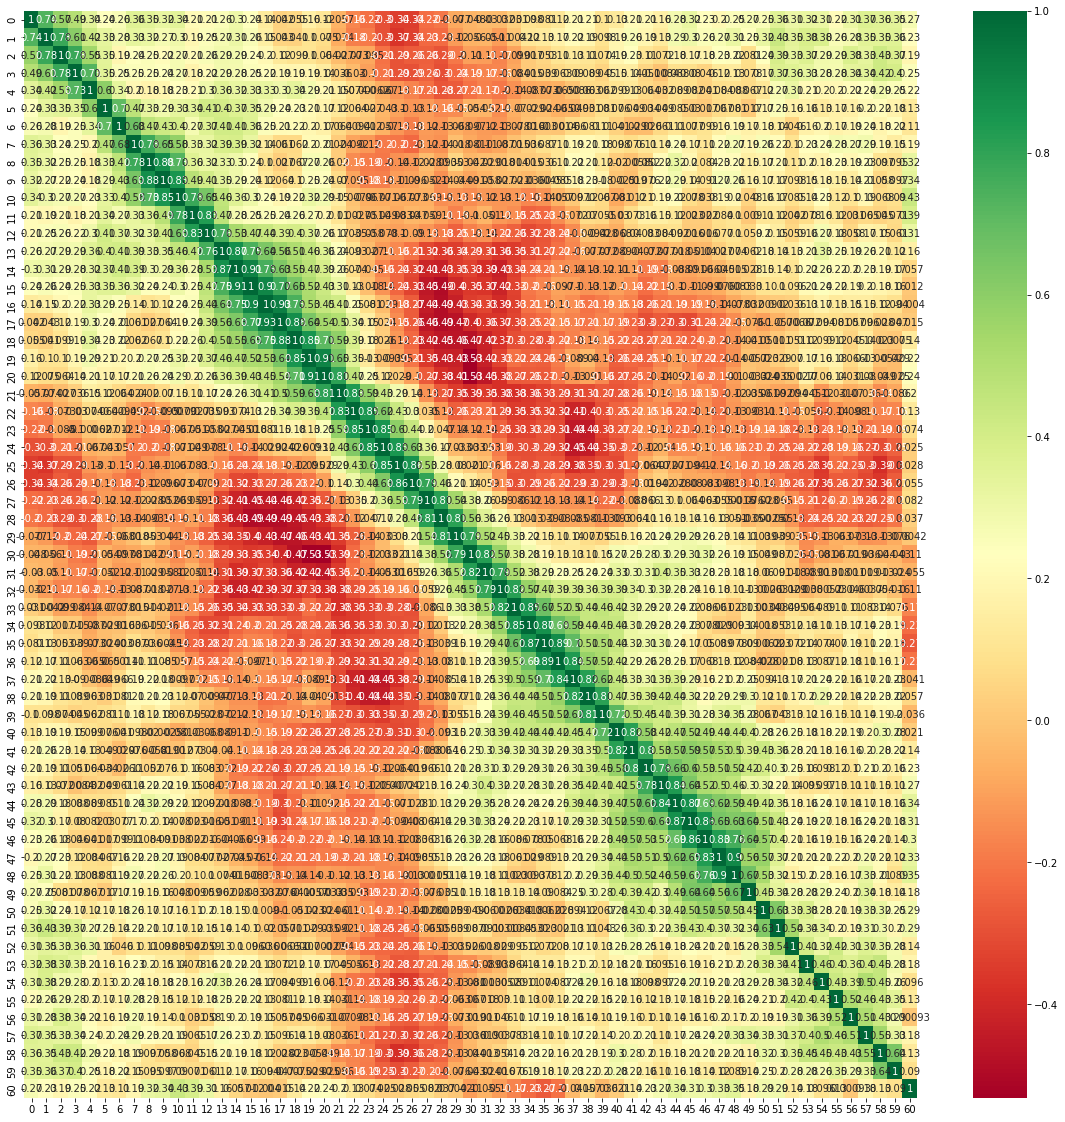

In [ ]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')


In [ ]:
# Lets split the data  into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(145, 60) (63, 60)


**We applied 6 machine learning algorithms but we got overfitting in two algorithms Decision Tree Algorithm and Random Forest so we did not consider, Support Vector Machine(RBF) algorithm gives good accuracy lets use this algorithm the predict**

In [ ]:
 from sklearn.linear_model import LogisticRegression
 log = LogisticRegression(random_state=0)
 log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski',p =2)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear',random_state= 0)
svc_lin.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf',random_state= 0)
svc_rbf.fit(X_train,Y_train)


SVC(random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =10, criterion='entropy',random_state = 0)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
print("MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY")
print("")
print("[0] logistic regression Accuracy             :" ,log.score(X_train,Y_train))
print("")
print("[1]  K N N algorithm  Accuracy               :" ,knn.score(X_train,Y_train))
print("")
print("[2] Support Vector Machine(svc) Accuracy     :" ,svc_lin.score(X_train,Y_train))
print("")
print("[3] Support Vector Machine(rbf)  algorithm   :" ,svc_rbf.score(X_train,Y_train))
print("")
print("[4] Naive Bayes Accuracy Accuracy            :" ,gauss.score(X_train,Y_train))
print("")
print("[5] Desion Tree Algorithm Accuracy           :" ,tree.score(X_train,Y_train))
print("")
print("[6] Random Forest Accuracy                   :" ,forest.score(X_train,Y_train))
print("")



    
    


MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY

[0] logistic regression Accuracy             : 0.8413793103448276

[1]  K N N algorithm  Accuracy               : 0.8620689655172413

[2] Support Vector Machine(svc) Accuracy     : 0.8689655172413793

[3] Support Vector Machine(rbf)  algorithm   : 0.9103448275862069

[4] Naive Bayes Accuracy Accuracy            : 0.7379310344827587

[5] Desion Tree Algorithm Accuracy           : 1.0

[6] Random Forest Accuracy                   : 1.0



**Standardization**

This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [ ]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))



**Improve results with algorithm tuning**

**KNN Tuning**

We can start off by tuning the number of neighbors for KNN. The default number of neighbors is 5. Below we try all odd values of k from 1 to 21, covering the default value of 5. Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [ ]:
# KNN Algorithm tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
num_folds = 10
scoring = 'accuracy'

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.8352380952380951 using {'n_neighbors': 1}
0.8352380952380951 (0.10189140989519598) with: {'n_neighbors': 1}
0.8285714285714285 (0.08772767593363313) with: {'n_neighbors': 3}
0.7880952380952382 (0.11206675205474538) with: {'n_neighbors': 5}
0.7814285714285715 (0.09614921321474276) with: {'n_neighbors': 7}
0.7604761904761905 (0.12342522776188249) with: {'n_neighbors': 9}
0.7466666666666666 (0.12596655784828417) with: {'n_neighbors': 11}
0.7385714285714285 (0.11951242594244552) with: {'n_neighbors': 13}
0.7457142857142857 (0.1241606741922458) with: {'n_neighbors': 15}
0.739047619047619 (0.14256796127730256) with: {'n_neighbors': 17}
0.718095238095238 (0.1385837009784006) with: {'n_neighbors': 19}
0.7176190476190476 (0.12375548271140872) with: {'n_neighbors': 21}


**SVM Tunning**

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [ ]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.8695238095238096 using {'C': 2.0, 'kernel': 'rbf'}
0.8219047619047618 (0.06728286651878121) with: {'C': 0.1, 'kernel': 'linear'}
0.5657142857142856 (0.1764836685383976) with: {'C': 0.1, 'kernel': 'poly'}
0.5442857142857143 (0.14045681868044785) with: {'C': 0.1, 'kernel': 'rbf'}
0.6976190476190477 (0.12950717680320817) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.7590476190476191 (0.07586836673011214) with: {'C': 0.3, 'kernel': 'linear'}
0.6919047619047618 (0.16218533112662523) with: {'C': 0.3, 'kernel': 'poly'}
0.7595238095238096 (0.09194916272635167) with: {'C': 0.3, 'kernel': 'rbf'}
0.7666666666666667 (0.08435429010135409) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.7590476190476191 (0.06976474884499978) with: {'C': 0.5, 'kernel': 'linear'}
0.7528571428571428 (0.09797148921197789) with: {'C': 0.5, 'kernel': 'poly'}
0.7880952380952381 (0.08577378887016043) with: {'C': 0.5, 'kernel': 'rbf'}
0.7742857142857142 (0.09752492558885197) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.7595238095238096

In [ ]:
# Ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=100))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=100))) 


From above obtained accuracies after doing the performance tunning of KNN and SVM(linear), we got the SVM(rbf) is the most suitable one wrt the chosen models, with a higher accuracy rate of 91.03%.

**Final Results**

In [ ]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_rbf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]!=1):
  print('The object is a Rock')
else:
  print('The object is a mine')

[0]
The object is a Rock


In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_rbf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]!=1):
  print('The object is a Rock')
else:
  print('The object is a mine')

[1]
The object is a mine
